In [1]:
# This workbook is for exploring the data that will be used for the capstone excercise

#The data source is a from a project that I am part of at my work. The intention of the project is to analysis 
# historical data of certain product and software sales through various sales channels and the offers to 
#understand which once have helped gain a margin of more than 60%. 
#The analysis will help to understand which offers have been performing as per business expectations. 

# NOTE. : The data that I will leverage is a subset and is not the actual products or sale value. 

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action="ignore")

In [3]:
#Importing the dataset
df=pd.read_csv("data/Booking-Data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3309 entries, 0 to 3308
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Fiscal Quarter ID       3309 non-null   object 
 1   Product Classification  3309 non-null   object 
 2   Item Category           3309 non-null   object 
 3   Sales Channel Code      3309 non-null   object 
 4   Offer Level 1           3309 non-null   object 
 5   Offer Level 2           3309 non-null   object 
 6   Product Bookings Net    3309 non-null   float64
 7   Product Standard Cost   3309 non-null   float64
dtypes: float64(2), object(6)
memory usage: 206.9+ KB


## Description
##### Sale period  
Quarter when the sales were made
##### Product classification 
Classification of product as Hardware Vs Software
##### Item Category : 
Category of the item (Hardware Products, License, IOS Software, Subscription)
##### Sales Channel code 
Channel Code (End Customer, Distributor, Retailer)
##### Offer level 1
Type of offer
##### Offer level 2 
Subcategory of the offer (What the customers see)
##### Bookings net 
Net booking value
##### Booking cost 
Cost of the offer

In [4]:
df.head()

,Fiscal Quarter ID,Product Classification,Item Category,Sales Channel Code,Offer Level 1,Offer Level 2,Product Bookings Net,Product Standard Cost
0,Quarter 1,Hardware,Hardware Products,Distributor,Conference Room,Conference room Infra,4.369957e+05,4.201881e+05
1,Quarter 1,Hardware,Hardware Products,END_CUSTOMER,Conference Room,Desktop,7.148818e+05,6.873863e+05
2,Quarter 1,Hardware,Hardware Products,UNKNOWN,End Point solution,IoT Device,1.754371e+04,1.686895e+04
3,Quarter 1,Hardware,Hardware Products,END_CUSTOMER,End Point solution,IoT Device,1.420321e+05,1.365693e+05
4,Quarter 1,Hardware,Hardware Products,Distributor,Conference Room,Desktop,6.796322e+06,6.534925e+06


In [5]:
# rounding the net and cost values to 2 decimals
df = df.round({'Product Bookings Net': 2,'Product Standard Cost' : 2}) 
df.head()

,Fiscal Quarter ID,Product Classification,Item Category,Sales Channel Code,Offer Level 1,Offer Level 2,Product Bookings Net,Product Standard Cost
0,Quarter 1,Hardware,Hardware Products,Distributor,Conference Room,Conference room Infra,436995.66,420188.13
1,Quarter 1,Hardware,Hardware Products,END_CUSTOMER,Conference Room,Desktop,714881.78,687386.33
2,Quarter 1,Hardware,Hardware Products,UNKNOWN,End Point solution,IoT Device,17543.71,16868.95
3,Quarter 1,Hardware,Hardware Products,END_CUSTOMER,End Point solution,IoT Device,142032.06,136569.29
4,Quarter 1,Hardware,Hardware Products,Distributor,Conference Room,Desktop,6796322.18,6534925.17


In [6]:
df.describe()

,Product Bookings Net,Product Standard Cost
count,3.309000e+03,3.309000e+03
mean,3.770823e+06,1.049653e+06
std,2.074623e+07,9.688719e+06
min,0.000000e+00,0.000000e+00
25%,1.606106e+04,5.705200e+02
50%,1.339477e+05,1.412635e+04
75%,1.168789e+06,1.898438e+05
max,7.317185e+08,4.878123e+08


##### Explore and understand the date. The visualization below will help understand the nature and distirbution of values for each feature

<AxesSubplot:xlabel='Product Classification', ylabel='count'>

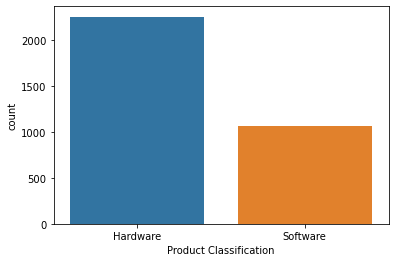

In [7]:
# check the distribution of Product classification
sns.countplot(x='Product Classification', data=df, label='Count')

<AxesSubplot:xlabel='Item Category', ylabel='count'>

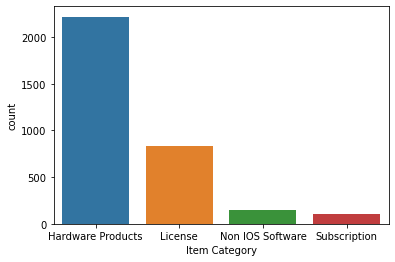

In [8]:
# check the Item Cateogry of Product classification
sns.countplot(x='Item Category', data=df, label='Count')

<AxesSubplot:xlabel='Sales Channel Code', ylabel='count'>

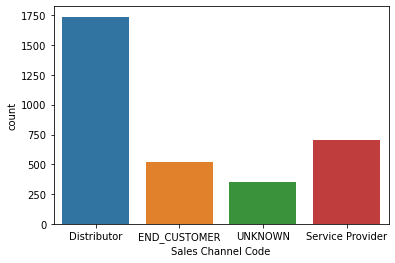

In [9]:
# check the distribution of Sales Channel Code
sns.countplot(x='Sales Channel Code', data=df, label='Count')

In [10]:
df['Offer Level 1'].value_counts()

End Point solution    1298
Conference Room       1115
Network Security       318
Product One            300
Others                 196
Control Center          82
Name: Offer Level 1, dtype: int64

In [11]:
df['Offer Level 2'].value_counts()

IoT Device                    525
Security & Routing            383
Desktop                       335
Conference room Infra         286
Screen Systems                272
Security License              258
License                       246
Product One - Perpetual       244
Non IOS Software              131
Wireless License              130
Switching License             105
Security & Routing License    100
Others                         64
ASN-NG                         60
Product One - Subscription     58
Switch                         47
Control Center console         35
Contact Center License         30
Name: Offer Level 2, dtype: int64

In [12]:
#Create Product Bookings Margin using Net & Cost 
df['Product Bookings Margin']=((df['Product Bookings Net']-df['Product Standard Cost'])
                               /df['Product Bookings Net']).replace(np.inf, 0)

In [13]:
# Mark the data with less than or equal to 60% margin as low margine and anything more as High Margin
df['High Margin'] = df['Product Bookings Margin'].apply(lambda x: 0 if x <=0.6 else 1 )

<AxesSubplot:xlabel='High Margin', ylabel='count'>

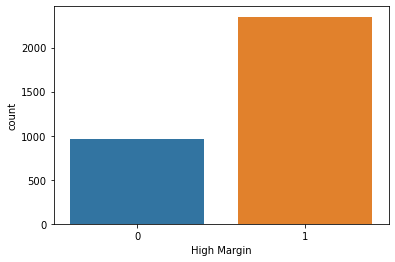

In [14]:
sns.countplot(x='High Margin', data=df, label='Count')

In [15]:
# check if there are any NULL values
df[df.isna().any(axis=1)]

,Fiscal Quarter ID,Product Classification,Item Category,Sales Channel Code,Offer Level 1,Offer Level 2,Product Bookings Net,Product Standard Cost,Product Bookings Margin,High Margin
109,Quarter 1,Hardware,Hardware Products,Distributor,End Point solution,Security & Routing,0.0,0.0,NaN,1
110,Quarter 1,Software,License,Distributor,End Point solution,Security & Routing License,0.0,0.0,NaN,1
192,Quarter 1,Hardware,Hardware Products,Distributor,End Point solution,Switch,0.0,0.0,NaN,1
193,Quarter 1,Software,License,Distributor,End Point solution,Switching License,0.0,0.0,NaN,1
369,Quarter 1,Software,License,END_CUSTOMER,End Point solution,Wireless License,0.0,0.0,NaN,1
370,Quarter 1,Software,License,END_CUSTOMER,End Point solution,Wireless License,0.0,0.0,NaN,1
2313,Quarter 1,Software,License,Distributor,End Point solution,Wireless License,0.0,0.0,NaN,1
2314,Quarter 1,Software,License,Distributor,End Point solution,Wireless License,0.0,0.0,NaN,1


In [16]:
# Delete rows with NaN 
Index_list = df.loc[pd.isna(df["Product Bookings Margin"]), :].index
df = df.drop(labels=Index_list,axis = 0)
df[df.isna().any(axis=1)]

,Fiscal Quarter ID,Product Classification,Item Category,Sales Channel Code,Offer Level 1,Offer Level 2,Product Bookings Net,Product Standard Cost,Product Bookings Margin,High Margin


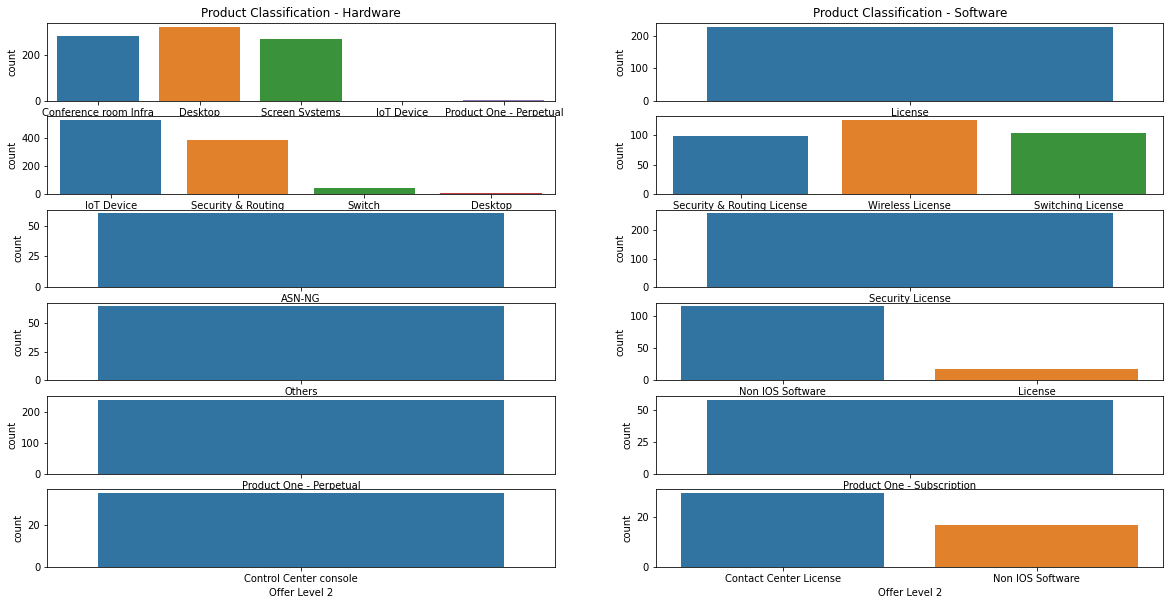

In [17]:
# Plot offer 2 by product classification to understand the distribution

OfferLevel1 = df['Offer Level 1'].unique()

cnt = len(pd.unique(df['Offer Level 1']))

fig, axes = plt.subplots(cnt, 2, figsize=(20, 10))

ind_x = 0
ind_y = 0

axes[0, 0].set_title("Product Classification - Hardware")
axes[0, 1].set_title("Product Classification - Software")

for value in OfferLevel1:
     sns.countplot(ax=axes[ind_x,ind_y], 
                   x='Offer Level 2', 
                   data=df[(df["Offer Level 1"] == value) & (df["Product Classification"] == "Hardware")],
                   label='Count')
     ind_y = ind_y + 1
     sns.countplot(ax=axes[ind_x,ind_y], 
                   x='Offer Level 2', 
                   data=df[(df["Offer Level 1"] == value) & (df["Product Classification"] == "Software")],
                   label='Count')
     ind_x = ind_x+1
     ind_y = 0
        
     

In [18]:
#Drop the columns which are not needed for modeling.
# Fiscal quater will not infulence the product manrgin since the data is just for one quarter
# Item category is not needed cause the sale is tied to offer level 2 
#Product booking net, cost are not needed since we have computed the product margin based on these values
df=df.drop(columns=['Fiscal Quarter ID','Item Category','Product Bookings Net',
                    'Product Standard Cost','Product Bookings Margin']) 

df.head()

,Product Classification,Sales Channel Code,Offer Level 1,Offer Level 2,High Margin
0,Hardware,Distributor,Conference Room,Conference room Infra,0
1,Hardware,END_CUSTOMER,Conference Room,Desktop,0
2,Hardware,UNKNOWN,End Point solution,IoT Device,0
3,Hardware,END_CUSTOMER,End Point solution,IoT Device,0
4,Hardware,Distributor,Conference Room,Desktop,0


In [19]:
# convert the categorical features to numirical
df1 = pd.get_dummies(df) 
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3301 entries, 0 to 3308
Data columns (total 31 columns):
 #   Column                                    Non-Null Count  Dtype
---  ------                                    --------------  -----
 0   High Margin                               3301 non-null   int64
 1   Product Classification_Hardware           3301 non-null   uint8
 2   Product Classification_Software           3301 non-null   uint8
 3   Sales Channel Code_Distributor            3301 non-null   uint8
 4   Sales Channel Code_END_CUSTOMER           3301 non-null   uint8
 5   Sales Channel Code_Service Provider       3301 non-null   uint8
 6   Sales Channel Code_UNKNOWN                3301 non-null   uint8
 7   Offer Level 1_Conference Room             3301 non-null   uint8
 8   Offer Level 1_Control Center              3301 non-null   uint8
 9   Offer Level 1_End Point solution          3301 non-null   uint8
 10  Offer Level 1_Network Security            3301 non-null   ui

<AxesSubplot:>

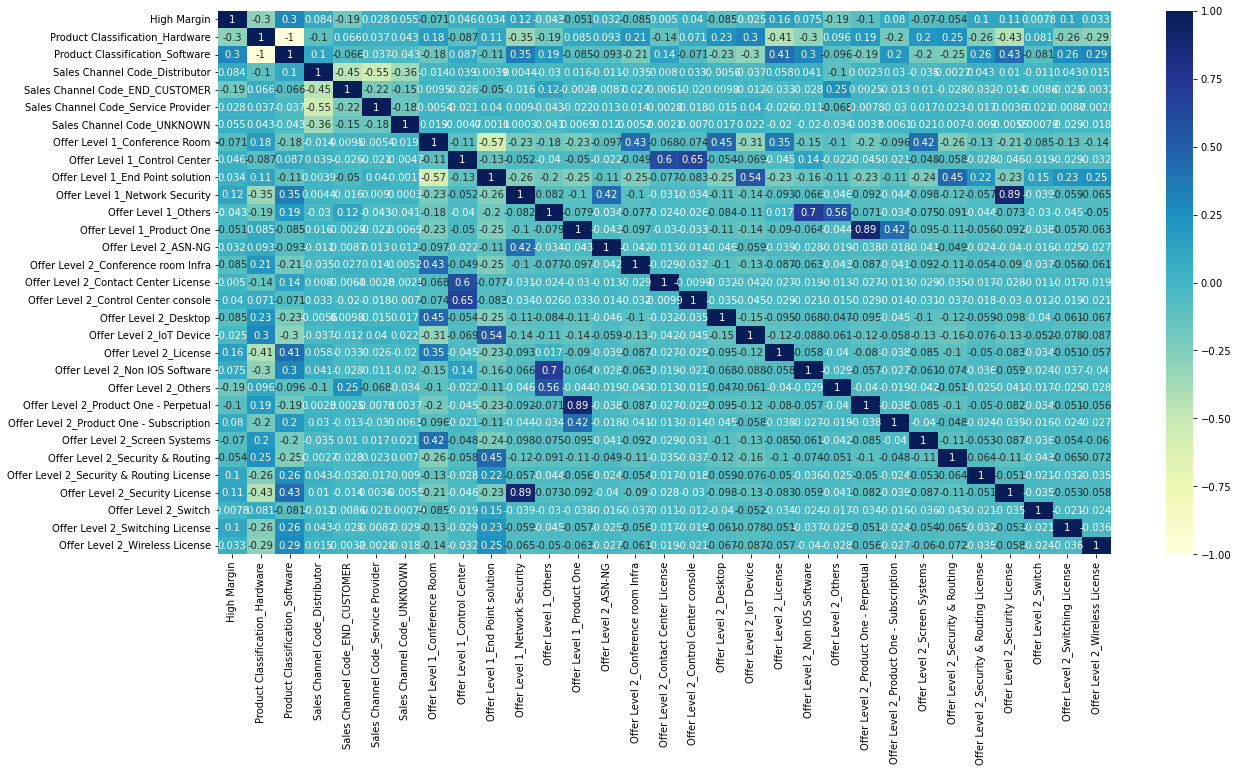

In [20]:
# Identify the correlation among the features 
plt.figure(figsize=(20,10))
sns.heatmap(data=df1.corr(), annot=True, cmap='YlGnBu')

In [21]:
# couple of level 1 and level 2 offers have strong correlation among themself
# likes Offer level 1 - Network security and level 2 corresponding license
# Product one and perpetual Hardware
# Software in general seems to have better corrrelation with the offers including Margin
# will leverage this data to run the modeles.

## Create Training and Test data

In [22]:
X=df.drop('High Margin',axis = 1)

In [23]:
y=df['High Margin']

In [24]:
# Get Dummies
X = pd.get_dummies(X)
y = pd.get_dummies(y)

In [25]:
print(X.columns)
print(y.columns)

Index(['Product Classification_Hardware', 'Product Classification_Software',
       'Sales Channel Code_Distributor', 'Sales Channel Code_END_CUSTOMER',
       'Sales Channel Code_Service Provider', 'Sales Channel Code_UNKNOWN',
       'Offer Level 1_Conference Room', 'Offer Level 1_Control Center',
       'Offer Level 1_End Point solution', 'Offer Level 1_Network Security',
       'Offer Level 1_Others', 'Offer Level 1_Product One',
       'Offer Level 2_ASN-NG', 'Offer Level 2_Conference room Infra',
       'Offer Level 2_Contact Center License',
       'Offer Level 2_Control Center console', 'Offer Level 2_Desktop',
       'Offer Level 2_IoT Device', 'Offer Level 2_License',
       'Offer Level 2_Non IOS Software', 'Offer Level 2_Others',
       'Offer Level 2_Product One - Perpetual',
       'Offer Level 2_Product One - Subscription',
       'Offer Level 2_Screen Systems', 'Offer Level 2_Security & Routing',
       'Offer Level 2_Security & Routing License',
       'Offer Level 2_S

In [26]:
y

,0,1
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
3304,0,1
3305,0,1
3306,0,1
3307,0,1


In [27]:
# Avoid dummy trap. 
y = y.drop([0], axis=1)

In [28]:
y

,1
0,0
1,0
2,0
3,0
4,0
...,...
3304,1
3305,1
3306,1
3307,1


In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X,
                                               y,
                                               test_size=0.33,
                                               random_state=1)

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(2211, 30) (1090, 30) (2211, 1) (1090, 1)


In [31]:
#Normalizing the data 
from sklearn.preprocessing import StandardScaler

In [32]:
sc = StandardScaler()
X_train_sc = pd.DataFrame(sc.fit_transform(X_train))
X_test_sc = pd.DataFrame(sc.transform(X_test))

# restore the feature name
X_train_sc.columns = X_train.columns.values
X_test_sc.columns = X_test.columns.values

# restore the row index
X_train_sc.index = X_train.index.values
X_test_sc.index = X_test.index.values

X_train = X_train_sc
X_test = X_test_sc

In [33]:
X_train

,Product Classification_Hardware,Product Classification_Software,Sales Channel Code_Distributor,Sales Channel Code_END_CUSTOMER,Sales Channel Code_Service Provider,Sales Channel Code_UNKNOWN,Offer Level 1_Conference Room,Offer Level 1_Control Center,Offer Level 1_End Point solution,Offer Level 1_Network Security,...,Offer Level 2_Others,Offer Level 2_Product One - Perpetual,Offer Level 2_Product One - Subscription,Offer Level 2_Screen Systems,Offer Level 2_Security & Routing,Offer Level 2_Security & Routing License,Offer Level 2_Security License,Offer Level 2_Switch,Offer Level 2_Switching License,Offer Level 2_Wireless License
1227,0.707826,-0.707826,-1.052484,-0.427768,1.932479,-0.348949,-0.718652,-0.164132,1.261756,-0.332411,...,-0.139154,-0.275522,-0.137455,-0.300394,2.775739,-0.180818,-0.300394,-0.115285,-0.178133,-0.193755
1971,-1.412776,1.412776,-1.052484,2.337715,-0.517470,-0.348949,1.391494,-0.164132,-0.792546,-0.332411,...,-0.139154,-0.275522,-0.137455,-0.300394,-0.360264,-0.180818,-0.300394,-0.115285,-0.178133,-0.193755
1656,0.707826,-0.707826,0.950134,-0.427768,-0.517470,-0.348949,-0.718652,-0.164132,1.261756,-0.332411,...,-0.139154,-0.275522,-0.137455,-0.300394,-0.360264,-0.180818,-0.300394,-0.115285,-0.178133,-0.193755
134,0.707826,-0.707826,-1.052484,-0.427768,-0.517470,2.865746,-0.718652,-0.164132,1.261756,-0.332411,...,-0.139154,-0.275522,-0.137455,-0.300394,-0.360264,-0.180818,-0.300394,-0.115285,-0.178133,-0.193755
420,0.707826,-0.707826,-1.052484,-0.427768,1.932479,-0.348949,-0.718652,-0.164132,-0.792546,-0.332411,...,-0.139154,3.629473,-0.137455,-0.300394,-0.360264,-0.180818,-0.300394,-0.115285,-0.178133,-0.193755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2771,-1.412776,1.412776,0.950134,-0.427768,-0.517470,-0.348949,-0.718652,-0.164132,1.261756,-0.332411,...,-0.139154,-0.275522,-0.137455,-0.300394,-0.360264,5.530435,-0.300394,-0.115285,-0.178133,-0.193755
911,0.707826,-0.707826,-1.052484,-0.427768,1.932479,-0.348949,-0.718652,-0.164132,1.261756,-0.332411,...,-0.139154,-0.275522,-0.137455,-0.300394,-0.360264,-0.180818,-0.300394,-0.115285,-0.178133,-0.193755
1102,0.707826,-0.707826,0.950134,-0.427768,-0.517470,-0.348949,-0.718652,-0.164132,1.261756,-0.332411,...,-0.139154,-0.275522,-0.137455,-0.300394,2.775739,-0.180818,-0.300394,-0.115285,-0.178133,-0.193755
239,0.707826,-0.707826,0.950134,-0.427768,-0.517470,-0.348949,1.391494,-0.164132,-0.792546,-0.332411,...,-0.139154,3.629473,-0.137455,-0.300394,-0.360264,-0.180818,-0.300394,-0.115285,-0.178133,-0.193755


In [34]:
X_train=X_train.values
X_test=X_test.values
y_train=y_train.values
y_test=y_test.values

## Build and Compare models

## Decision Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [36]:
clf = DecisionTreeClassifier(criterion='entropy',random_state=0)
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [37]:
y_prediction=clf.predict(X_test)

In [38]:
from mlxtend.evaluate import bias_variance_decomp

In [39]:
mse,bias, var = bias_variance_decomp(clf,                                     
                                     X_train, y_train, X_test, y_test, 
                                     loss='mse', num_rounds=200, random_seed=1)

In [40]:
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [41]:
Accuracy = accuracy_score(y_test, y_prediction)
Precision = metrics.precision_score(y_test, y_prediction, average='macro')
Recall = metrics.recall_score(y_test, y_prediction, average='macro')
MAE = metrics.mean_absolute_error(y_test, y_prediction)
MSE = metrics.mean_squared_error(y_test, y_prediction)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_prediction))
AvgBias = bias
AvgVar = var

results = pd.DataFrame([['Decision Tree', Accuracy, Precision, Recall, 
                         MAE, MSE, RMSE, AvgBias, AvgVar]],
                         columns = ['Model', 'Accuracy', 'Precision', 'Recall', 
                                    'MAE', 'MSE', 'RMSE','Avg Bias','Avg Variance'])

## KNN

In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [43]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [44]:
y_prediction = knn.predict(X_test)

In [45]:
mse,bias, var = bias_variance_decomp(knn, X_train, y_train, X_test, y_test, 
                                     loss='mse', 
                                     num_rounds=200, 
                                     random_seed=1)

In [46]:
Accuracy = accuracy_score(y_test, y_prediction)
Precision = metrics.precision_score(y_test, y_prediction, average='macro')
Recall = metrics.recall_score(y_test, y_prediction, average='macro')
MAE = metrics.mean_absolute_error(y_test, y_prediction)
MSE = metrics.mean_squared_error(y_test, y_prediction)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_prediction))
AvgBias = bias
AvgVar = var

model_results = pd.DataFrame([['K-Nearest Neighbors (KNN)', Accuracy, Precision, Recall, 
                         MAE, MSE, RMSE, AvgBias, AvgVar]],
                         columns = ['Model', 'Accuracy', 'Precision', 'Recall', 
                                    'MAE', 'MSE', 'RMSE', 'Avg Bias', 'Avg Variance'])

results = results.append(model_results, ignore_index = True)

## Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
# Create a Logistic Regression Object, perform Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [49]:
y_prediction = log_reg.predict(X_test)

In [50]:
mse,bias, var = bias_variance_decomp(log_reg, 
                                     X_train, y_train, X_test, y_test, 
                                     loss='mse', 
                                     num_rounds=200, random_seed=1)

In [51]:
Accuracy = accuracy_score(y_test, y_prediction)
Precision = metrics.precision_score(y_test, y_prediction, average='macro')
Recall = metrics.recall_score(y_test, y_prediction, average='macro')
MAE = metrics.mean_absolute_error(y_test, y_prediction)
MSE = metrics.mean_squared_error(y_test, y_prediction)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_prediction))
AvgBias = bias
AvgVar = var

model_results = pd.DataFrame([['Logistic Regression', Accuracy, Precision, Recall, 
                         MAE, MSE, RMSE, AvgBias, AvgVar]],
                         columns = ['Model', 'Accuracy', 'Precision', 'Recall', 
                                    'MAE', 'MSE', 'RMSE', 'Avg Bias', 'Avg Variance'])

results = results.append(model_results, ignore_index = True)

## Naives Bayes

In [52]:
from sklearn.naive_bayes import GaussianNB 

In [53]:
model = GaussianNB()                     
model.fit(X_train, y_train) 

GaussianNB()

In [54]:
y_prediction = model.predict(X_test)             

In [55]:
mse,bias, var = bias_variance_decomp(model, 
                                     X_train, y_train, X_test, y_test, 
                                     loss='mse', 
                                     num_rounds=200, 
                                     random_seed=1)

In [56]:
Accuracy = accuracy_score(y_test, y_prediction)
Precision = metrics.precision_score(y_test, y_prediction, average='macro')
Recall = metrics.recall_score(y_test, y_prediction, average='macro')
MAE = metrics.mean_absolute_error(y_test, y_prediction)
MSE = metrics.mean_squared_error(y_test, y_prediction)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_prediction))
AvgBias = bias
AvgVar = var

model_results = pd.DataFrame([['NAIVES BAYES', Accuracy, Precision, Recall, 
                         MAE, MSE, RMSE, AvgBias, AvgVar]],
                         columns = ['Model', 'Accuracy', 'Precision', 'Recall', 
                                    'MAE', 'MSE', 'RMSE', 'Avg Bias', 'Avg Variance'])

results = results.append(model_results, ignore_index = True)

## Random Forest

In [57]:
from sklearn import ensemble

In [58]:
rf_clf=ensemble.RandomForestClassifier(n_estimators=500)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500)

In [59]:
y_prediction = rf_clf.predict(X_test)

In [60]:
mse,bias, var = bias_variance_decomp(rf_clf, 
                                     X_train, y_train, X_test, y_test, 
                                     loss='mse', 
                                     num_rounds=5, 
                                     random_seed=1)

In [61]:
Accuracy = accuracy_score(y_test, y_prediction)
Precision = metrics.precision_score(y_test, y_prediction, average='macro')
Recall = metrics.recall_score(y_test, y_prediction, average='macro')
MAE = metrics.mean_absolute_error(y_test, y_prediction)
MSE = metrics.mean_squared_error(y_test, y_prediction)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_prediction))
AvgBias = bias
AvgVar = var

model_results = pd.DataFrame([['Random Forest', Accuracy, Precision, Recall, 
                         MAE, MSE, RMSE, AvgBias, AvgVar]],
                         columns = ['Model', 'Accuracy', 'Precision', 'Recall', 
                                    'MAE', 'MSE', 'RMSE', 'Avg Bias', 'Avg Variance'])

results = results.append(model_results, ignore_index = True)

## Vector Machine

In [62]:
from sklearn.svm import SVC

In [63]:
svc_clf = SVC(probability=True, kernel='linear')
svc_clf.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

In [64]:
y_prediction = svc_clf.predict(X_test)

In [65]:
mse,bias, var = bias_variance_decomp(svc_clf, 
                                     X_train, y_train, X_test, y_test, 
                                     loss='mse', 
                                     num_rounds=5, 
                                     random_seed=1)

In [66]:
Accuracy = accuracy_score(y_test, y_prediction)
Precision = metrics.precision_score(y_test, y_prediction, average='macro')
Recall = metrics.recall_score(y_test, y_prediction, average='macro')
MAE = metrics.mean_absolute_error(y_test, y_prediction)
MSE = metrics.mean_squared_error(y_test, y_prediction)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_prediction))
AvgBias = bias
AvgVar = var

model_results = pd.DataFrame([['Vector Machine', Accuracy, Precision, Recall, 
                         MAE, MSE, RMSE, AvgBias, AvgVar]],
                         columns = ['Model', 'Accuracy', 'Precision', 'Recall', 
                                    'MAE', 'MSE', 'RMSE', 'Avg Bias', 'Avg Variance'])

results = results.append(model_results, ignore_index = True)

In [67]:
results

,Model,Accuracy,Precision,Recall,MAE,MSE,RMSE,Avg Bias,Avg Variance
0,Decision Tree,0.704587,0.621852,0.564786,16.141284,0.295413,0.543519,335.208294,0.053289
1,K-Nearest Neighbors (KNN),0.640367,0.611289,0.629643,61.645872,0.359633,0.599694,271.388116,0.171799
2,Logistic Regression,0.725688,0.670369,0.587783,12.857798,0.274312,0.523748,353.096410,0.020629
3,NAIVES BAYES,0.565138,0.646707,0.656571,102.034862,0.434862,0.659441,607.223461,0.026137
4,Random Forest,0.708257,0.629929,0.566516,14.972477,0.291743,0.540133,352.679266,0.039119
5,Vector Machine,0.718349,0.811755,0.529462,0.747706,0.281651,0.530708,327.759633,0.041835


In [68]:
# SVM seems to be a better model based on the above results. Will continue to use the same to redict.

In [69]:
#The rest of the work book is submitted as part of Assignment 24. 